# <center> R1.04 Méthodes d'optimisation <br> TP3b - Interpolation polynomiale : le partage de secret </center>
<center> 2022/2023 - Thibault Godin & Lucie Naert </center>
<center> IUT de Vannes, BUT Informatique </center>

Le but de ce TP est de présenter deux applications de l'interpolation polynôminale : le _partage de secret de Shamir_ et un exemple jouet de protocole de _correction d'erreurs_.

In [4]:
import numpy as np
import random

# Affichage graphique

#%matplotlib notebook 
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline

import itertools

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.colors as mcolors

names_col = list(mcolors.XKCD_COLORS)

import time

from collections import Counter



On rappelle le théorème central de l'interpolation :


<div class="alert alert-block alert-info"><b>Théorème</b> 
    
    
Soient $n$ points $(x_1,y_1), ..., (x_n,y_n)$ de $\mathbb{R}^2$ 

    
Alors il existe un unique polynôme $P_{(x_1,y_1), ..., (x_n,y_n)}$ de degré $n-1$  tel que $P_{(x_1,y_1), ..., (x_n,y_n)}(x_i) = y_i$
   
</div>



In [5]:

def pol_li(varX,i,X,Y):
    li=1
    for j in range(len(X)):
        if i!=j:
            li=li*((varX-X[j])/(X[i]-X[j]))
    return Y[i]*li



def pol_Lagrange(varX,X,Y):
    l=0
    for i in range(len(X)):
        l=l+pol_li(varX,i,X,Y)
        
    return np.round(l)

## Partage de secret : protocole de Shamir


Contexte : 
supposons qu'on veuille distribuer un secret $S$ (un nombre) à $m$ personnes $p_1, ..., p_m$

Le but est que 
- $n$ personnes (ou plus) peuvent connaître facilement le secret ($n\leq m$)
- $n-1$ personnes (ou moins) ne peuvent pas le découvrir (facilement)


L'approche par du Shamir Secret Sharing (SSS)  (simplifiée) est alors :

- partage : 
    - créer un polynôme $P$ de degré $n-1$ tel que $P(0)=S$ en tirant aléatoirement $n-1$ valeurs pour les $P(-k), k \in \{1,2,...,n-1\}$
    - attribuer à chaque personne $p_i$, $i \in \{1,2,...,m\}$, la valeur $s_i=P(i)$
- reconstruction :
    - si $n$ personne $p_{i_1}, ..., p_{i_n}$ créent le polynôme $Q$ interpolant $(i_1,s_{i_1}), ..., (i_n,s_{i_n})$, alors $Q=P$ et donc l'évaluation de ce polynôme en $0$ donne $S$
    
Les  $s_i$ sont appelés les sous-secrets.

**Question 1** 

1. Écrire une fonction `partage(S,m,n)` avec $S$ le secret (un nombre), $m$ le nombre de personnes partageant le secret et $n$ le nombre de personne necessaire à la reconstruction du secret. Cette fonction renvoie la liste des $s_i$ pour $i$ allant de $1$ à $m$ ainsi que $X$ (vecteurs des absisses des noeuds d'interpolation) et $Y$ (vecteurs des ordonnées des noeuds d'interpolation). Attention : $X$ et $Y$ n'ont d'intérêts que pour la représentation graphique, ils ne devront pas être utilisés pour la reconstruction.

2. Remplir la légende du graphique

[55, -501, -880, -249]
Voici les sous-secrets à partager :  [55.0, -491.0, -863.0, -244.0, -244.0, 55.0, -491.0]
Ainsi, la personne 1 recevra le sous secret 55.0


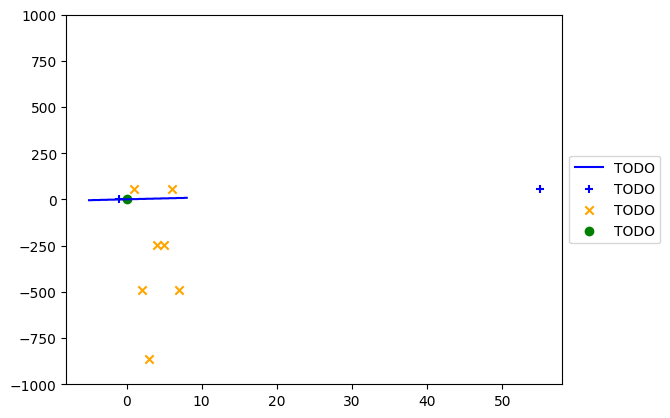

In [92]:
#secret 
S=55

#nombre de personnes partageant le secret
m=7

#nombre de personnes necessaires à la reconstruction
n=5

def partage(S, n, m):
    rng = [random.randint(-1000, 1000) for _ in range(n - 1)]
    rng[0] = S
    X = [-1, rng[0]]
    Y = [0, S]
    si = []
    
    print(rng)
    for i in range(0, m):
        j =  i - n if i >= n - 1 else i
        si.append(pol_Lagrange(rng[j],X,Y))
    return X,Y,si

X,Y,si = partage(S,n,m)
print("Voici les sous-secrets à partager : ", si)
print("Ainsi, la personne 1 recevra le sous secret", si[0])

#Représentation graphique
tab_x=np.linspace(-n,m+1,500)
tab_yLagrange=pol_Lagrange(tab_x,X,Y)
pi = np.arange(1,m+1)# Entier de 1 à m inclus
plt.plot(tab_x,tab_yLagrange, color='blue', label ="TODO" )
plt.scatter(X,Y, color='blue', marker='+',label ="TODO")
plt.scatter(pi,si, color='orange', marker='x',label ="TODO")
plt.scatter(0,pol_Lagrange(0,X,Y), color='green', marker='o',label ="TODO")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-1000, 1000) #pour voir les détails des points pris au hasard
plt.show()

**question 2**

1. Écrire une fonction `reconstruction(k,sk)` permettant de retrouver le secret. `k` est la liste des indices des personnes se rassemblant pour partager leur sous-secret (indice $\in \{1,2,...,m\}$). `sk` est la liste des sous-secrets (de même taille que `k`). 
2. Montrez que vous arrivez à retrouver le secret $S$ quand on a $n$ (ou plus) sous-secrets mais pas quand on en a moins.

In [9]:
def reconstruction(k,sk):
    return #todo


S = 55
m = 10
n = 4
_,_,si = partage(S,n,m)


k=[1,4,5,9] #Choix de n indices entre 1 et m
sk = [si[x-1] for x in k]
print(reconstruction(k,sk))

NameError: name 'X' is not defined

**activité**

À l'aide de ce protocole, partager un secret à 6 de vos camarades de manières à ce qu'il faille au moins 3 d'entre-eux pour le reconstruire.


----

## Suréchantillonage et introduction aux codes de Reed-Solomon


Le but de cette partie est de vous donner un protocole de correction d'erreur qui peut-être vu comme une (grosse) simplification des codes de Reed-Solomon.

Le principe est le suivant :

On veut transmettre un message de $k$ lettres (entiers) $m_0,...,m_{k-1} $ sur un canal bruité.

Pour cela, on va transmettre les $k$ lettres plus $t$ lettres supplémentaires $r_0,...,r_{t-1}$, construites comme suit :
- on calcule le polynôme d'interpolation $P=P_{(0,m_0),...,(k-1,m_{k-1})}$ 
- $r_i = P(k+i)$
    
    
On transmet le vecteur $[m_0,...,m_{k-1},r_0,...,r_{t-1}]$



**question 3**

1. Écrire une fonction `lettreSup(t,xm,m)` calculant `r` les $t$ lettres supplémentaires ainsi que `xr` leur indice (les $t$ abscisses des lettres supplémentaires).
2. Compléter la légende de la représentation graphique  

In [5]:

k=7
t=3

xm=np.arange(k)
m=random.sample(range(-100, 100), k)

def lettreSup(t, xm, m):
    #todo
    return xr, r

xr,r = lettreSup(t, xm, m)


#Représentation graphique
plt.scatter(xm,m, color='blue', label = "TODO")
plt.scatter(xr,r, color='red', label = "TODO")

xcont=np.linspace(-.25,k+t-0.75,500)
plt.plot(xcont,pol_Lagrange(xcont,xm,m), color='green', label ="TODO")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

NameError: name 'xr' is not defined

La détection d'erreur se fait en évaluant tous les polynômes $Q_S$ interpolant un sous-ensemble $S$ de taille $k$ $S \subset \{(0,m_0),...,(k-1,m_{k-1}),(k,r_0),...,(k+t-1,r_{t-1})\}$


Si toutes les valeurs $Q_s(i) , i \in \{0,...,k+t-1\}$ s'accordent, alors il n'y a (très très probablement) pas d'erreur.


**question 4**

1. Écrire une fonction `detectErreur(k,yt)` où k est le nombre de lettres du message et `yt` est la liste complète des lettres ($[m_0,...,m_{k-1},r_0,...,r_{t-1}]$). Cette fonction renvoie `True` s'il y a une erreur dans le message et `False` s'il n'y a (très très probablement) pas d'erreur.

_python_ on pourra utiliser `list_s= list(itertools.combinations(...))` pour construire les sous-ensembles.

2. Compléter la légende de la représentation graphique

In [6]:
def detectErreur(k, yt):
    
    return False



k = 7
t = 3
xm = np.arange(k)
m = random.sample(range(-100, 100), k)
_,r = lettreSup(t, xm, m)
yt = m+r
yt = np.asarray(yt)
print("Erreur de transmission :", detectErreur(k, yt))

#Rajout d'erreurs
yError = yt.copy()
yError[1] = 0
yError[4] = 0 

print("Erreur de transmission :", detectErreur(k, yError))


NameError: name 'xr' is not defined

In [7]:
#Représentation graphique
xcont=np.linspace(-.25,len(yt)-0.75,500)
plt.scatter(xm,m, color='blue', label = "TODO")
plt.scatter(xr,r, color='red', label = "TODO")
plt.plot(xcont,pol_Lagrange(xcont,xm,m), color='green', label ="TODO")


xt = np.arange(len(yt))
list_s= list(itertools.combinations(xt, k))
s0 = list(list_s[0])
s1 = list(list_s[4])
plt.plot(xcont,pol_Lagrange(xcont,s0,yError[s0]), color='red', label ="TODO")
plt.plot(xcont,pol_Lagrange(xcont,s1,yError[s1]), color='red', linestyle = '--', label = "TODO")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

NameError: name 'yt' is not defined

La correction d'erreurs est plus subtile.

**question 5**

Que se passe t'il quand on a 1 erreur de transmission ?
Proposer une fonction de correction `correctErreur(k, yt)` en cas d'erreur. Cette fonction doit renvoyer le message corrigé.

In [8]:
def correctErreur(k, yt):
    #todo
    return y

    
    
k = 7
t = 3
xm = np.arange(k)
m = random.sample(range(-100, 100), k)
_,r = lettreSup(t, xm, m)
yt = m+r
yt = np.asarray(yt)
print("Message original :", yt)
print("Avant correction :", yt)
print("Après correction :", correctErreur(k,yt))


yError = yt.copy()
yError[1] = 0
print("Message original :", yt)
print("Avant correction :", yError)
print("Après correction :", correctErreur(k,yt))


NameError: name 'xr' is not defined

##### Extensions suggérées :

#### Corrections d'erreur dans le cas où on a $t$ erreurs exactement
Faire de la correction d'erreur dans le cas où il y a autant d'erreurs que de lettres ajoutées en fin de message. 

_python_ on pourra utiliser sub= list(itertools.combinations(...)) pour construire les sous-ensembles et from collections import Counter pour compter les valeurs


#### corps finis

Les fonctions présentées sont normalement implémentées sur des corps finis ($\mathbb{Z} / \mathbb{pZ}$, comme vu en crypto).

Adapter vos fonctions et présenter des exemples. Justifier l'iteret de travailler sur ces corps finis

#### codes de Reed-Solomon

Comprendre et implémenter (une version éventuellement simplifiée) des 
[bonne référence](http://www.fa17.eecs70.org/static/notes/n9.html)
